In [26]:
# Exercise 1.5
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import scipy.stats as st

In [27]:
S = 500
n = 300
B = 300
mean = [0,0,0]
cov = [[1,0.2*math.sqrt(2),0.2],[0.2*math.sqrt(2),2,0.2*math.sqrt(2)],[0.2,0.2*math.sqrt(2),1]]

In [28]:
h_begin = -5
h_end = 5
step_size = 0.5
step_num = int((h_end - h_begin) / step_size) + 1

h_all = [0 for i in range(step_num)]
bias_all = [[0 for i in range(step_num)] for j in range(5)]
risk_all = [[0 for i in range(step_num)] for j in range(5)]

for i in range(step_num):
    h = h_begin + i * step_size
    h_all[i] = h
    print("h=",h)
    current = min( np.array([0,h,2*h])/math.sqrt(n) )


    for s in range(S):
        print("s=",s)
        X = np.random.multivariate_normal(np.array([0,h,2*h])/math.sqrt(n), cov, n)

        # phi[0]
        estimator = sum(X)/len(X)
        temp_diff = (min(estimator) - current)
        bias_all[0][i] += temp_diff / S
        risk_all[0][i] += math.pow(temp_diff,2) / S

        # phi[1]
        temp = 0
        for b in range(B):
            W_star = np.random.uniform(0,1,n)
            X_star = random.choices(X,weights=W_star,k=n)
            temp += min(sum(X_star)/len(X_star))
        temp_diff = 2* min(estimator) - temp / B - current
        bias_all[1][i] += temp_diff / S
        risk_all[1][i] += math.pow(temp_diff,2) / S

        # phi[2]
        temp = 0
        for b in range(B):
            V = np.random.multivariate_normal([0,0,0], [[0.7,0,0],[0,0.7,0],[0,0,0.7]], 1)[0]
            temp += min( estimator + V/math.sqrt(n) )
        temp_diff = temp / B - current
        bias_all[2][i] += temp_diff / S
        risk_all[2][i] += math.pow(temp_diff,2) / S

        # phi[3]
        temp1 = 0
        temp2 = 0
        for p in range(3):
            temp1 += estimator[p] * math.exp(-math.sqrt(n) * estimator[p])
            temp2 += math.exp(-math.sqrt(n) * estimator[p])
        temp_diff = temp1 / temp2 - current
        bias_all[3][i] += temp_diff / S
        risk_all[3][i] += math.pow(temp_diff,2) / S

        # phi[4]
        X1 = X[0:int(0.2*n)]
        X2 = X[int(0.2*n):len(X)]
        estimator1 = sum(X1) / len(X1)
        k = np.argmin(estimator1)
        estimator2 = sum(X2) / len(X2)
        temp_diff = estimator2[k] - current
        bias_all[4][i] += temp_diff / S
        risk_all[4][i] += math.pow(temp_diff,2) / S

Streaming output truncated to the last 5000 lines.
s= 9
s= 10
s= 11
s= 12
s= 13
s= 14
s= 15
s= 16
s= 17
s= 18
s= 19
s= 20
s= 21
s= 22
s= 23
s= 24
s= 25
s= 26
s= 27
s= 28
s= 29
s= 30
s= 31
s= 32
s= 33
s= 34
s= 35
s= 36
s= 37
s= 38
s= 39
s= 40
s= 41
s= 42
s= 43
s= 44
s= 45
s= 46
s= 47
s= 48
s= 49
s= 50
s= 51
s= 52
s= 53
s= 54
s= 55
s= 56
s= 57
s= 58
s= 59
s= 60
s= 61
s= 62
s= 63
s= 64
s= 65
s= 66
s= 67
s= 68
s= 69
s= 70
s= 71
s= 72
s= 73
s= 74
s= 75
s= 76
s= 77
s= 78
s= 79
s= 80
s= 81
s= 82
s= 83
s= 84
s= 85
s= 86
s= 87
s= 88
s= 89
s= 90
s= 91
s= 92
s= 93
s= 94
s= 95
s= 96
s= 97
s= 98
s= 99
s= 100
s= 101
s= 102
s= 103
s= 104
s= 105
s= 106
s= 107
s= 108
s= 109
s= 110
s= 111
s= 112
s= 113
s= 114
s= 115
s= 116
s= 117
s= 118
s= 119
s= 120
s= 121
s= 122
s= 123
s= 124
s= 125
s= 126
s= 127
s= 128
s= 129
s= 130
s= 131
s= 132
s= 133
s= 134
s= 135
s= 136
s= 137
s= 138
s= 139
s= 140
s= 141
s= 142
s= 143
s= 144
s= 145
s= 146
s= 147
s= 148
s= 149
s= 150
s= 151
s= 152
s= 153
s= 154
s= 155
s= 156
s= 15

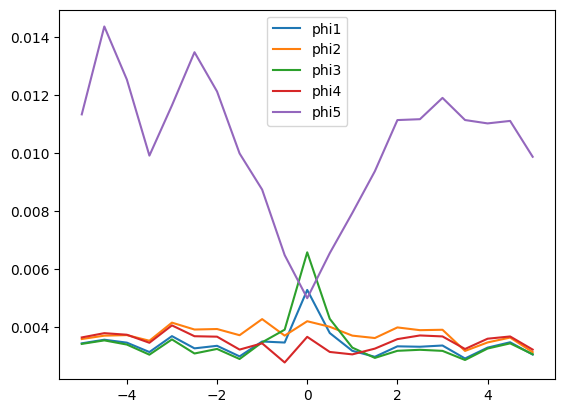

In [29]:
plt.plot(h_all, risk_all[0],label="phi1")
plt.plot(h_all, risk_all[1],label="phi2")
plt.plot(h_all, risk_all[2],label="phi3")
plt.plot(h_all, risk_all[3],label="phi4")
plt.plot(h_all, risk_all[4],label="phi5")
leg = plt.legend()
plt.show()

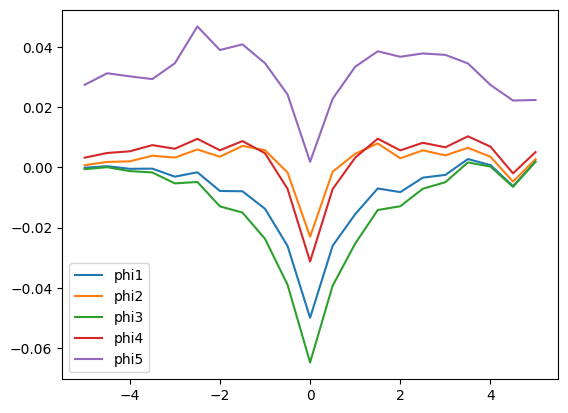

In [30]:
plt.plot(h_all, bias_all[0],label="phi1")
plt.plot(h_all, bias_all[1],label="phi2")
plt.plot(h_all, bias_all[2],label="phi3")
plt.plot(h_all, bias_all[3],label="phi4")
plt.plot(h_all, bias_all[4],label="phi5")
leg = plt.legend()
plt.show()

In [33]:
# Exercise 1.2
Fang = 0
Cher = 0
split = 0

for s in range(S):
    print("s=",s)
    alpha = 0.05
    all_test = [0 for i in range(B)]
    X = np.random.multivariate_normal(mean, cov, n)
    X_mean = sum(X)/len(X)

    # Fang and Santos
    temp = 0
    for b in range(B):
        W_star = np.random.uniform(0,1,n)
        X_star = random.choices(X,weights=W_star,k=n)
        temp = (sum(X_star)/len(X_star))
        all_test[b] = min(math.sqrt(n) * (temp - X_mean) )
    Fang += (np.quantile(all_test, (1-alpha))/math.sqrt(n)) / S

    # Chernozhukov, Lee, and Rosen
    temp_matrix = [[0 for i in range(3)] for j in range(3)]
    for k in range(n):
        for i in range(3):
            for j in range(3):
                temp_matrix[i][j] += (X[k] - X_mean)[i] * (X[k] - X_mean)[j] / n

    X_var_sqrt = sqrtm(temp_matrix)
    para = 1 - 0.1 / math.log(n)
    all_k = [0 for i in range(B)]
    temp_p = [[1,0,0],
            [0,1,0],
            [0,0,1]
            ]
    all_Z = [0 for i in range(B)]
    for b in range(B):
        Z = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]], 1)[0]
        all_Z[b] = Z
        temp_k_v = [0 for i in range(3)]
        for i in range(3):
            g = np.matmul(temp_p[i],X_var_sqrt)
            temp_k_v[i] = np.matmul(g,Z)/np.linalg.norm(g)
        all_k[b] = max(temp_k_v)

    final_k = np.quantile(all_k, para)
    V_index = []
    temp = [0 for i in range(3)]
    for i in range(3):
        g = np.matmul(temp_p[i],X_var_sqrt)
        s = np.linalg.norm(g) / math.sqrt(n)
        temp[i] = X_mean[i] + final_k * s
    final_rhs = min(temp)

    for i in range(3):
        g = np.matmul(temp_p[i],X_var_sqrt)
        s = np.linalg.norm(g) / math.sqrt(n)
        if (X_mean[i] -2*final_k* s) <= final_rhs:
            V_index.append(i)

    all_k = [0 for i in range(B)]
    for b in range(B):
        temp_k_v = [0 for i in V_index]
        for i in V_index:
            g = np.matmul(temp_p[i],X_var_sqrt)
            temp_k_v[i] = np.matmul(g,Z)/np.linalg.norm(g)
        all_k[b] = max(temp_k_v)
    final_k = np.quantile(all_k, (1-alpha))

    temp = [0 for i in range(3)]
    for i in range(3):
        g = np.matmul(temp_p[i],X_var_sqrt)
        temp[i] = X_mean[i] + final_k * np.linalg.norm(g) / math.sqrt(n)

    Cher += min(temp) / S

    # sample splitting
    X1 = X[0:int(0.2*n)]
    X2 = X[int(0.2*n):len(X)]
    estimator1 = sum(X1) / len(X1)
    k = np.argmin(estimator1)
    X2_mean = sum(X2)/len(X2)
    temp_matrix = [[0 for i in range(3)] for j in range(3)]
    for m in range(int(0.8*n)):
        for i in range(3):
            for j in range(3):
                temp_matrix[i][j] += (X2[m] - X2_mean)[i] * (X2[m] - X2_mean)[j] / (0.8*n)
    split += (X2_mean[k] + st.norm.ppf(1-alpha) * temp_matrix[k][k] / math.sqrt(0.8*n)) / S

s= 0
s= 1
s= 2
s= 3
s= 4
s= 5
s= 6
s= 7
s= 8
s= 9
s= 10
s= 11
s= 12
s= 13
s= 14
s= 15
s= 16
s= 17
s= 18
s= 19
s= 20
s= 21
s= 22
s= 23
s= 24
s= 25
s= 26
s= 27
s= 28
s= 29
s= 30
s= 31
s= 32
s= 33
s= 34
s= 35
s= 36
s= 37
s= 38
s= 39
s= 40
s= 41
s= 42
s= 43
s= 44
s= 45
s= 46
s= 47
s= 48
s= 49
s= 50
s= 51
s= 52
s= 53
s= 54
s= 55
s= 56
s= 57
s= 58
s= 59
s= 60
s= 61
s= 62
s= 63
s= 64
s= 65
s= 66
s= 67
s= 68
s= 69
s= 70
s= 71
s= 72
s= 73
s= 74
s= 75
s= 76
s= 77
s= 78
s= 79
s= 80
s= 81
s= 82
s= 83
s= 84
s= 85
s= 86
s= 87
s= 88
s= 89
s= 90
s= 91
s= 92
s= 93
s= 94
s= 95
s= 96
s= 97
s= 98
s= 99
s= 100
s= 101
s= 102
s= 103
s= 104
s= 105
s= 106
s= 107
s= 108
s= 109
s= 110
s= 111
s= 112
s= 113
s= 114
s= 115
s= 116
s= 117
s= 118
s= 119
s= 120
s= 121
s= 122
s= 123
s= 124
s= 125
s= 126
s= 127
s= 128
s= 129
s= 130
s= 131
s= 132
s= 133
s= 134
s= 135
s= 136
s= 137
s= 138
s= 139
s= 140
s= 141
s= 142
s= 143
s= 144
s= 145
s= 146
s= 147
s= 148
s= 149
s= 150
s= 151
s= 152
s= 153
s= 154
s= 155
s= 156
s= 157
s= 1

In [34]:
print(Fang, Cher, split)

0.03862319171688112 -0.007308089097829426 0.14602792540128026
